# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
soup = bs(html, "html.parser")


In [5]:
# Extract all rows of data

# examining results
results = soup.find('table', class_='table')


In [6]:
for query in results:
    print(query)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
headers = soup.find_all('th')
info = soup.find_all('tr', class_='data-row')

In [9]:
# Create an empty list

table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

# Loop through the scraped data to create a list of rows

# table headers
for header in headers:
    table_headers.append(header.text)

# retrieving data
for i in info:
   # appending id
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # appending terrestial dates
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # appending sol
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id=mars_id.find_next_sibling('td')
    
    # appending month
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending min_temp
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending pressure
    pressure.append(float(mars_id.find_next_sibling("td").text))


In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure
mars_df



id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

In [13]:
# Confirm DataFrame was created successfully


id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# checking the data types
dtypes = mars_df.dtypes
print(dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [14]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [13]:
dtypes = mars_df.dtypes
print(dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [14]:
mars_df

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

In [16]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?

max_month = mars_df["month"].max()
print(f'There are {max_month} months on Mars.')



There are 12 months on Mars.


In [16]:
# 2. How many Martian days' worth of data are there?

data_days = mars_df["sol"].max() - mars_df["sol"].min() + 1
print(f'There are {data_days} Martian days of data in this dataset.')


There are 1968 Martian days of data in this dataset.


From the data below the 3rd month is the coldest and the 8th month is the warmest.


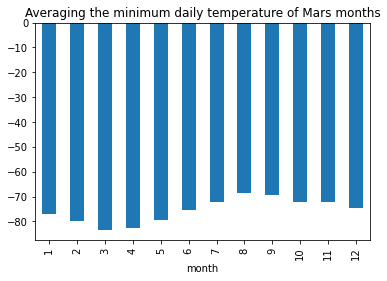

In [19]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

avg_temp = mars_df.groupby(['month'])['min_temp'].mean()
print(f'From the data below the 3rd month is the coldest and the 8th month is the warmest.')

# plotting the results as a bar chart
avg_temp.plot.bar(x='Month on Mars', y='Average Minimum Temp', title='Averaging the minimum daily temperature of Mars months');


From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.


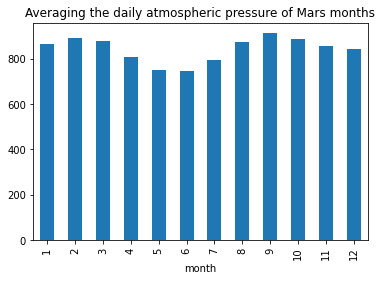

In [20]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?

# finding the average the daily atmospheric pressure of all the months
avg_pressure = mars_df.groupby(["month"])["pressure"].mean()
print(f'From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.')

# plotting the results as a bar chart
avg_pressure.plot.bar(x='Month on Mars', y='Average Pressure', title='Averaging the daily atmospheric pressure of Mars months');

The data is across 2021 Earth days and from the plot below it seems like there are 2.5 years worth of Martian data
With this information I estimate that there are 808.4 Earth days in a Martian year


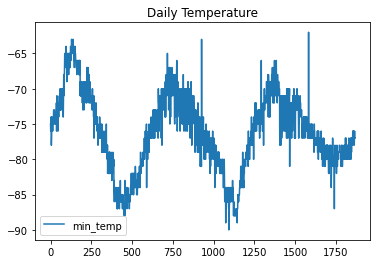

In [21]:
# 5. About how many terrestrial (Earth) days exist in a Martian year?

start_date_earth = mars_df['terrestrial_date'].min()
end_date_earth = mars_df['terrestrial_date'].max()
earth_days = (end_date_earth - start_date_earth).days
min_temp = mars_df[['min_temp']]
print(f'The data is across {earth_days} Earth days and from the plot below it seems like there are 2.5 years worth of Martian data')
martian_years = 2.5
earth_days_in_martian_year = earth_days/2.5
print(f'With this information I estimate that there are {earth_days_in_martian_year} Earth days in a Martian year')
min_temp.plot(title='Daily Temperature');


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV

# exporting data into a csv
output_csv = 'Mars Data/mars_data.csv'

mars_df.to_csv(output_csv,header=True,index=False)


In [23]:
browser.quit()